# Практическая работа №3
## по предмету "Системы искусственного интеллекта"

Целью практической работы является изучение методов регрессии.

В данно работе вам необходимо:
1. используя библиотеку sklearn, обучить линейную регрессию без использования регуляризации
2. изучить работу класса Lasso для регуляризации, подобрать наилучший параметр для данного набора данных.
3. изучить работу класса Ridge для регуляризации, подобрать наилучший параметр альфа для данного набора данных.

In [1]:
import pandas as pd

df = pd.read_csv('AISP2.csv')

df.head()

brand processor_brand processor_name processor_gnrtn ram_gb ram_type  \
0    ASUS           Intel        Core i3            10th   4 GB     DDR4   
1  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
2  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
3    ASUS           Intel        Core i5            10th   8 GB     DDR4   
4    ASUS           Intel   Celeron Dual   Not Available   4 GB     DDR4   

      ssd      hdd       os  os_bit graphic_card_gb  weight     warranty  \
0    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
1    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
2    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
3  512 GB     0 GB  Windows  32-bit            2 GB  Casual  No warranty   
4    0 GB   512 GB  Windows  64-bit            0 GB  Casual  No warranty   

  Touchscreen msoffice  Price   rating  Number of Ratings  Number of Reviews  
0          No       No  34649  2 stars                  3                  0  
1          No       No  38999  3 stars                 65                  5  
2          No       No  39999  3 stars                  8                  1  
3          No       No  69990  3 stars                  0                  0  
4          No       No  26990  3 stars                  0                  0

In [2]:
df['ram_gb'] = df['ram_gb'].str.replace(' GB', '').astype(float)
df['ssd'] = df['ssd'].str.replace(' GB', '').astype(float)
df['hdd'] = df['hdd'].str.replace(' GB', '').astype(float)
df['graphic_card_gb'] = df['graphic_card_gb'].str.replace(' GB', '').astype(float)
df['rating'] = df['rating'].str.replace(' stars', '').str.replace(' star', '').astype(float)

df = pd.get_dummies(df, 
    columns=['brand', 'processor_brand', 'processor_name', 'ram_type', 
             'os', 'os_bit', 'Touchscreen', 'msoffice', 'warranty', 'processor_gnrtn', 'weight'])

df.corr(numeric_only=True)['Price'].sort_values(ascending=False)

Price                            1.000000
ssd                              0.628272
ram_gb                           0.518323
graphic_card_gb                  0.459986
processor_name_Core i7           0.377777
processor_name_Core i9           0.359096
brand_APPLE                      0.312112
os_Mac                           0.312112
processor_name_M1                0.274581
processor_brand_M1               0.274581
processor_name_Ryzen 9           0.253506
weight_Casual                    0.247878
processor_gnrtn_12th             0.219060
Touchscreen_Yes                  0.189126
ram_type_LPDDR3                  0.181314
ram_type_LPDDR4X                 0.173809
ram_type_DDR5                    0.168689
processor_gnrtn_10th             0.164034
os_DOS                           0.140780
brand_MSI                        0.123952
msoffice_No                      0.105752
warranty_3 years                 0.080610
processor_name_Ryzen 7           0.061872
ram_type_DDR3                    0

In [3]:
from sklearn.model_selection import train_test_split

y = df['Price']

X = df.drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f"RMSE: {np.sqrt(mse):.2f}") # рублей
print(f'R²: {r2:.4f}')

MSE: 638671150.10
RMSE: 25271.94
R²: 0.6723


c:\Users\Serafim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.145e+10, tolerance: 1.100e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\Serafim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.426e+10, tolerance: 1.135e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\Serafim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

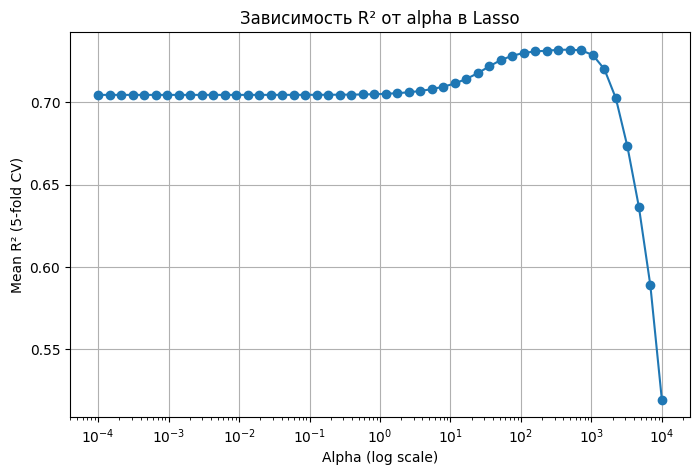

Максимальный R²: 0.7321
Лучшее alpha: 494.1713361323828


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

# Сетка значений alpha
alphas = np.logspace(-4, 4, 50)
r2_scores = []

for alpha in alphas:
    lasso = make_pipeline(StandardScaler(), Lasso(alpha=alpha, random_state=42))
    scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2')
    r2_scores.append(np.mean(scores))

# Построим график
plt.figure(figsize=(8,5))
plt.semilogx(alphas, r2_scores, marker='o')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Mean R² (5-fold CV)")
plt.title("Зависимость R² от alpha в Lasso")
plt.grid(True)
plt.show()

max_idx = np.argmax(r2_scores)
max_r2 = r2_scores[max_idx]
best_alpha = alphas[max_idx]

print(f"Максимальный R²: {max_r2:.4f}")
print(f"Лучшее alpha: {best_alpha}")


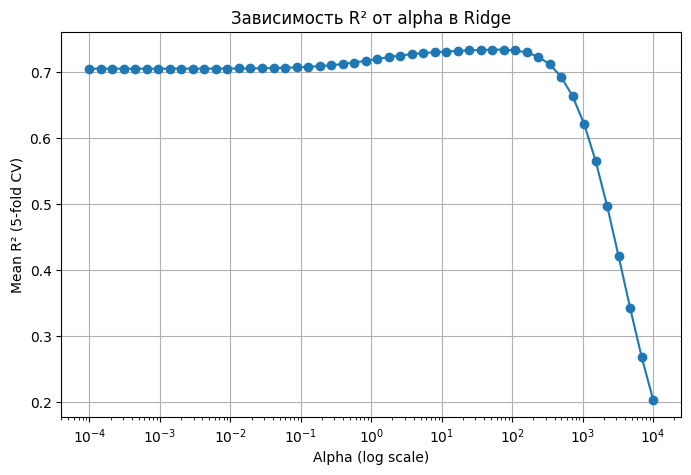

Максимальный R²: 0.7344
Лучшее alpha: 51.79474679231202


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

# Сетка значений alpha
alphas = np.logspace(-4, 4, 50)
r2_scores = []

for alpha in alphas:
    lasso = make_pipeline(StandardScaler(), Ridge(alpha=alpha, random_state=42))
    scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2')
    r2_scores.append(np.mean(scores))

# Построим график
plt.figure(figsize=(8,5))
plt.semilogx(alphas, r2_scores, marker='o')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Mean R² (5-fold CV)")
plt.title("Зависимость R² от alpha в Ridge")
plt.grid(True)
plt.show()

max_idx = np.argmax(r2_scores)
max_r2 = r2_scores[max_idx]
best_alpha = alphas[max_idx]

print(f"Максимальный R²: {max_r2:.4f}")
print(f"Лучшее alpha: {best_alpha}")
